# CAPITAL ASSET PRICING MODEL (CAPM)

In [83]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# EXPLORATORY DATA ANALYSIS

In [84]:
df = pd.read_csv('stocks_dataset.csv')
df

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,251.960007,36.389999,498.619995,162.270004,29.620001,16.320000,1485.000000,3294.610107
1695,8/4/2020,249.830002,36.349998,509.640015,165.070007,30.010000,16.719999,1487.000000,3306.510010
1696,8/5/2020,249.119995,36.790001,502.109985,174.279999,29.850000,16.719999,1485.020020,3327.770020
1697,8/6/2020,265.279999,37.689999,509.079987,172.199997,29.840000,18.459999,1489.579956,3349.159912


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [86]:
df.describe()

,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000
mean,135.966863,31.296698,195.423654,218.325633,35.296986,25.720865,311.299388,2413.219428
std,50.062473,11.508628,127.700712,98.968191,3.412142,5.200605,203.097452,424.825240
min,44.820000,14.010000,44.887142,95.010002,26.770000,7.140000,120.500000,1741.890015
25%,88.080002,19.600001,90.474998,132.840004,32.790001,21.935001,218.829994,2053.294921
50%,136.759995,31.610001,143.830002,158.289993,34.900002,25.879999,253.740005,2360.159912
75%,178.075005,38.229999,320.024993,334.360001,38.004999,29.250000,323.565002,2783.330078
max,268.440002,73.309998,548.729980,440.619995,43.470001,38.029999,1643.000000,3386.149902


# DATA SCALING

In [87]:
def normalize(df):
    x = df.copy()
    for col in x.columns[1:]:
        x[col] = x[col] / x[col][0]
    return x

In [88]:
normalize(df)

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,11/8/2013,0.999369,0.927617,1.024598,1.015056,1.001709,1.027449,0.986979,1.013428
2,11/11/2013,0.971405,0.955457,1.033807,1.007756,0.997721,1.033369,1.035272,1.014160
3,11/12/2013,0.980025,0.933185,1.021018,1.006235,1.001709,1.036598,0.985905,1.011756
4,11/13/2013,1.024180,0.948775,1.025760,1.012623,0.998861,1.060280,0.992345,1.019947
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,5.297729,0.810468,10.678394,1.233899,0.843634,0.878364,10.624597,1.885705
1695,8/4/2020,5.252944,0.809577,10.914398,1.255190,0.854742,0.899892,10.638906,1.892516
1696,8/5/2020,5.238015,0.819376,10.753136,1.325222,0.850185,0.899892,10.624740,1.904685
1697,8/6/2020,5.577796,0.839421,10.902404,1.309406,0.849900,0.993541,10.657365,1.916927



- If you invested $$1000 in NFLX on November 7th, 2013, 1000*10.595087= $10595.087 have on Aug 7th, 2020.

# DATA VISUALIZATION

In [89]:
def interactive_plot(df, title):
    fig = px.line(title = title)
    for col in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[col], name = col)
    fig.show()

In [90]:
interactive_plot(df, 'Prices')

In [91]:
# Normalized interactive chart
interactive_plot(normalize(df), 'Normalized Prices')

# DAILY RETURNS

In [92]:
def returns(df):
    daily_returns_df = df.copy()
    for col in df.columns[1:]:
        for idx in range(1,len(df)):
            daily_returns_df[col][idx] = ((df[col][idx] - df[col][idx -1]) / df[col][idx -1])*100

        daily_returns_df[col][0] = 0
    return daily_returns_df

In [ ]:
daily_returns_df =  returns(df)

In [94]:
daily_returns_df.head()

,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,11/8/2013,-0.063082,-7.238307,2.459768,1.505597,0.170883,2.744887,-1.302144,1.342756
2,11/11/2013,-2.798229,3.001200,0.898778,-0.719159,-0.398064,0.576223,4.893077,0.072293
3,11/12/2013,0.887446,-2.331002,-1.237020,-0.150907,0.399655,0.312495,-4.768482,-0.237039
4,11/13/2013,4.505467,1.670635,0.464452,0.634774,-0.284328,2.284533,0.653116,0.809534


# BETA

<Axes: xlabel='sp500', ylabel='TSLA'>

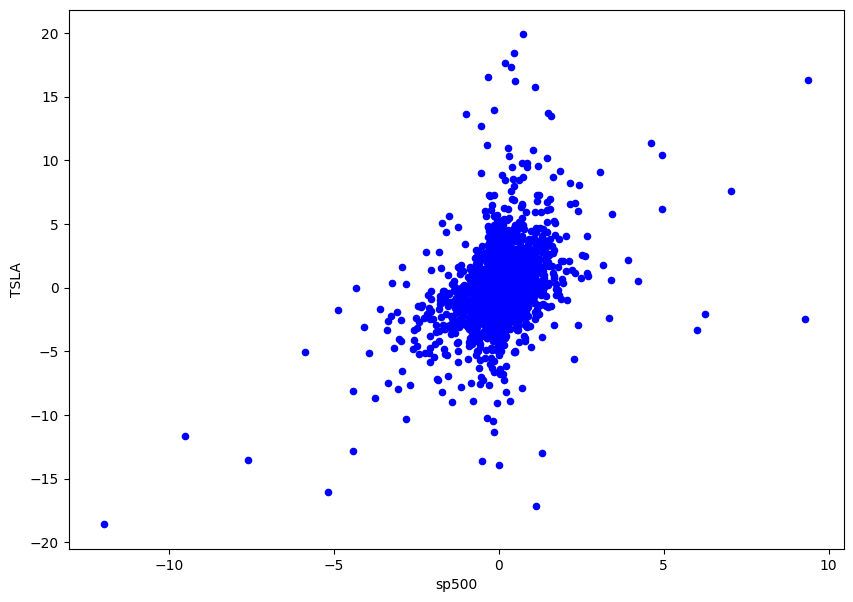

In [95]:
daily_returns_df.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'b', figsize=(10,7) )

In [96]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!

for col in daily_returns_df.columns[1:]:
    beta, alpha = np.polyfit(daily_returns_df['sp500'], daily_returns_df[col], 1)
    print('Beta for {} stock is = {:.2f} and alpha is = {:.2f}'.format(col, beta, alpha))

Beta for FB stock is = 1.10 and alpha is = 0.07
Beta for TWTR stock is = 1.17 and alpha is = -0.00
Beta for NFLX stock is = 1.04 and alpha is = 0.13
Beta for BA stock is = 1.43 and alpha is = -0.02
Beta for T stock is = 0.75 and alpha is = -0.03
Beta for MGM stock is = 1.65 and alpha is = -0.03
Beta for TSLA stock is = 1.24 and alpha is = 0.14
Beta for sp500 stock is = 1.00 and alpha is = 0.00


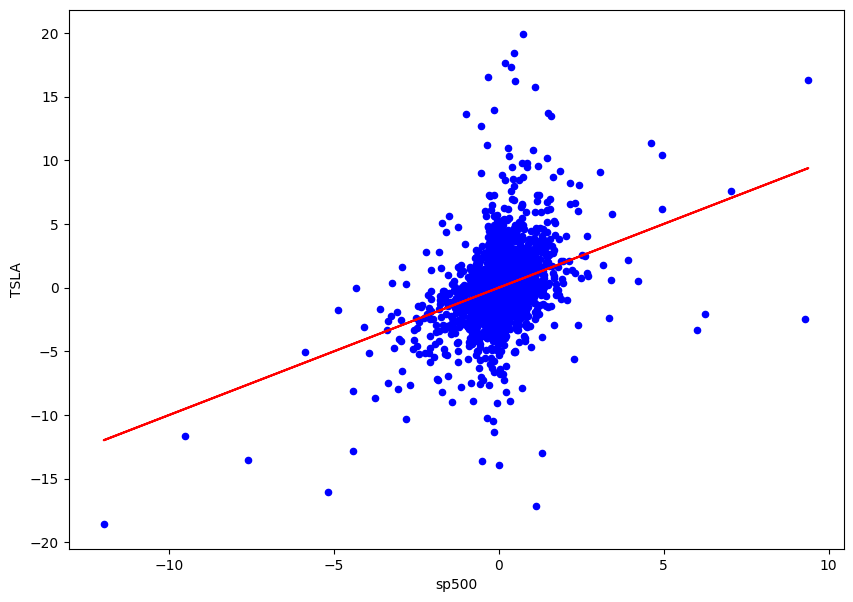

In [97]:
daily_returns_df.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'b', figsize=(10,7))
# Straight line equation is y = beta * rm + alpha
plt.plot(daily_returns_df['sp500'], beta * daily_returns_df['sp500'] + alpha, '-', color = 'r')


# CAPM

In [98]:
beta, alpha = np.polyfit(daily_returns_df['sp500'], daily_returns_df['TSLA'], 1)
beta

np.float64(1.2359723602006576)

In [99]:
daily_returns_df['sp500'].mean()

np.float64(0.04457361768265508)

In [100]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/

rm = daily_returns_df['sp500'].mean()*252
rm

np.float64(11.23255165602908)

In [101]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Expected Return
ER_TSLA  = rf + beta*(rm - rf)
print(ER_TSLA)

13.883123381378068


# BETA FOR ALL STOCKS

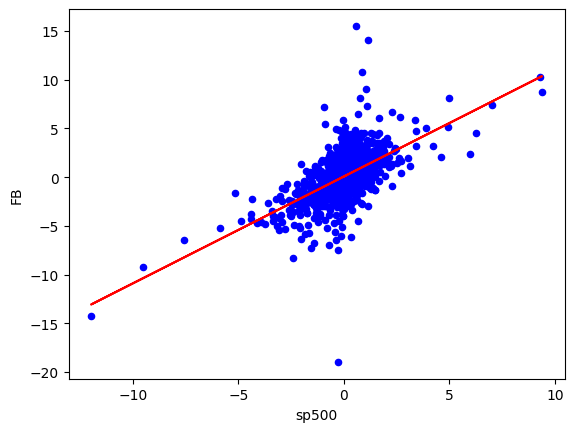

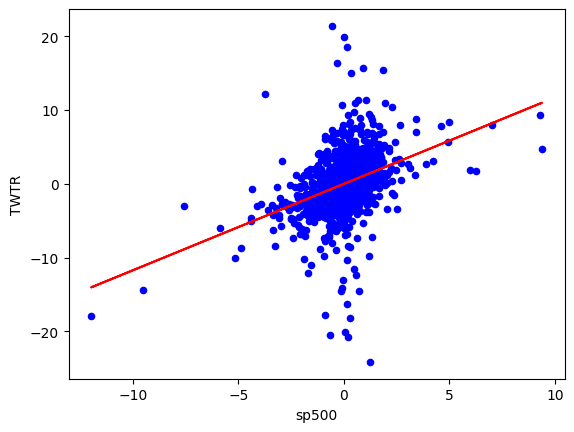

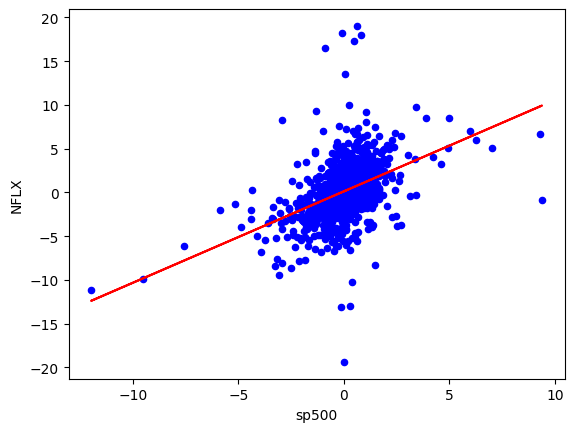

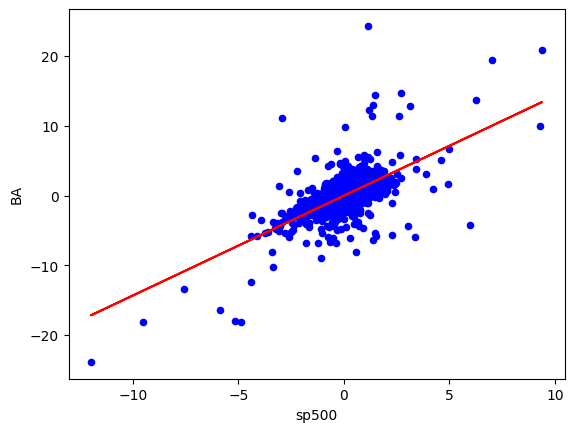

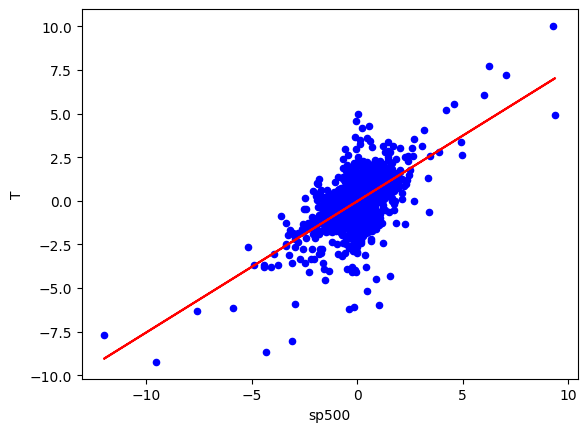

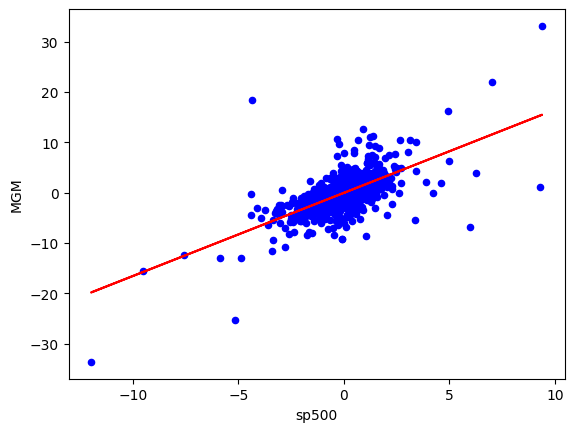

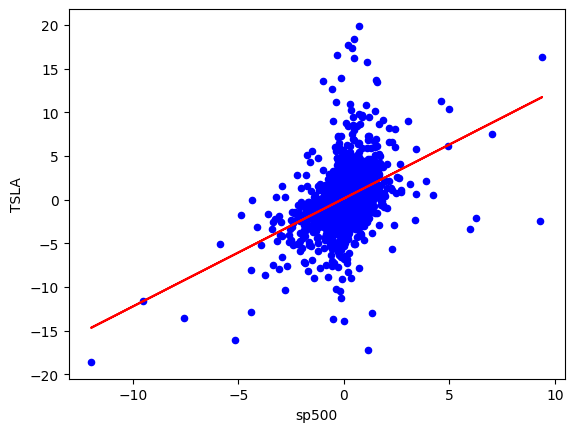

In [106]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in daily_returns_df.columns:

  # Ignoring the date and S&P500 Columns
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    daily_returns_df.plot(kind = 'scatter', x = 'sp500', y = i, color = 'b')

    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(daily_returns_df['sp500'], daily_returns_df[i], 1)

    beta[i] = b
    alpha[i] = a

    plt.plot(daily_returns_df['sp500'], b * daily_returns_df['sp500'] + a, '-', color = 'r')

    plt.show()

In [103]:
# Let's view Beta for every stock
beta

{'FB': np.float64(1.096849088020326),
 'TWTR': np.float64(1.172359618315995),
 'NFLX': np.float64(1.0445724485449472),
 'BA': np.float64(1.4304608163084231),
 'T': np.float64(0.7523861924715606),
 'MGM': np.float64(1.6517124147928917),
 'TSLA': np.float64(1.2359723602006576)}

In [107]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in daily_returns_df.columns:

  if i != 'Date' and i != 'sp500':

    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(daily_returns_df, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(daily_returns_df['sp500'], daily_returns_df[i], 1)

    # Plot the straight line
    fig.add_scatter(x = daily_returns_df['sp500'], y = b*daily_returns_df['sp500'] + a)
    fig.show()